**Load Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam (1).csv", encoding="latin-1")

dataset = dataset.dropna(how="any", axis=1)
dataset.columns = ['target', 'message']

dataset.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
dataset['message_len'] = dataset['message'].apply(lambda x: len(x.split(' ')))
dataset.head()

,target,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [4]:
max(dataset['message_len'])

171

**Exploratory Data Analysis**

In [5]:
balance_counts = dataset.groupby('target')['target'].agg('count').values
balance_counts

array([4825,  747])

In [6]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['ham'],
    y=[balance_counts[0]],
    name='ham',
    text=[balance_counts[0]],
    textposition='auto',
   
))
fig.add_trace(go.Bar(
    x=['spam'],
    y=[balance_counts[1]],
    name='spam',
    text=[balance_counts[1]],
    textposition='auto',
    
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>'
)
fig.show()

In [7]:
ham_dataset = dataset[dataset['target'] == 'ham']['message_len'].value_counts().sort_index()
spam_dataset = dataset[dataset['target'] == 'spam']['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_dataset.index,
    y=ham_dataset.values,
    name='ham',
    fill='tozeroy',
    
))
fig.add_trace(go.Scatter(
    x=spam_dataset.index,
    y=spam_dataset.values,
    name='spam',
    fill='tozeroy',
    
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

**Data Preprocessing**

Case Folding

In [8]:
import re 
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
dataset['message_clean'] = dataset['message'].apply(clean_text)
dataset.head()

,target,message,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,6,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"nah i don't think he goes to usf, he lives aro..."


Tokenisasi

In [10]:
def tokenize(message_clean):
    token = nltk.word_tokenize(message_clean)
    return token

In [11]:

import nltk
nltk.download('punkt')
dataset['tokenized'] = dataset['message_clean'].apply(tokenize)

print('Tokenizing Result : \n') 
print(dataset['tokenized'].head())
print('\n\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Tokenizing Result : 

0    [go, until, jurong, point, ,, crazy.., availab...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, goes, to, usf, ,,...
Name: tokenized, dtype: object






Stopwords

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stop_words(message_clean):
    removed_stop_words = []
    for review in message_clean:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in stop_words])
        )
    return removed_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
dataset['stopwords_removed'] = dataset['tokenized'].apply(remove_stop_words)

print('Stopwords Result : \n') 
print(dataset['stopwords_removed'].head())
print('\n\n\n')

Stopwords Result : 

0    [go, , jurong, point, ,, crazy.., available, ,...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, , , wkly, comp, , win, fa, cup, ...
3    [u, dun, say, , early, hor, ..., u, c, already...
4    [nah, , , n't, think, , goes, , usf, ,, , live...
Name: stopwords_removed, dtype: object






Stemming

In [14]:
dataset['stemming_removed'] = dataset['stopwords_removed'].apply(remove_stop_words)

print('Stemming Result : \n') 
print(dataset['stopwords_removed'].head())
print('\n\n\n')

Stemming Result : 

0    [go, , jurong, point, ,, crazy.., available, ,...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, , , wkly, comp, , win, fa, cup, ...
3    [u, dun, say, , early, hor, ..., u, c, already...
4    [nah, , , n't, think, , goes, , usf, ,, , live...
Name: stopwords_removed, dtype: object






**Clustering K-Means With Mini Batch**

Clustering

In [15]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Clustering by the target

In [16]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(dataset.message_clean)
text1 = tfidf.transform(dataset.message_clean)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning:

init_size=10 should be larger than n_clusters=12. Setting it to min(3*n_clusters, n_samples)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning:

init_size=10 should be larger than n_clusters=14. Setting it to min(3*n_clusters, n_samples)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning:

init_size=10 should be larger than n_clusters=16. Setting it to min(3*n_clusters, n_samples)



Fit 14 clusters
Fit 16 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning:

init_size=10 should be larger than n_clusters=18. Setting it to min(3*n_clusters, n_samples)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning:

init_size=10 should be larger than n_clusters=20. Setting it to min(3*n_clusters, n_samples)



Fit 18 clusters
Fit 20 clusters


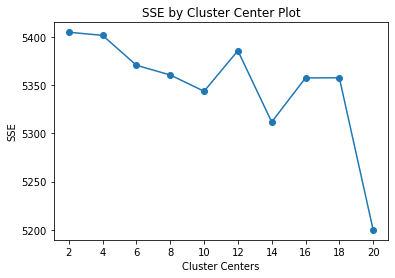

In [17]:
import matplotlib.pyplot as plt
def find_optimal_clusters(dataset, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=10, batch_size=30, random_state=20).fit(dataset).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text1, 20)

In [18]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=10, batch_size=30, random_state=20).fit_predict(text1)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning:

init_size=10 should be larger than n_clusters=16. Setting it to min(3*n_clusters, n_samples)



In [19]:
pip install matplotlib

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



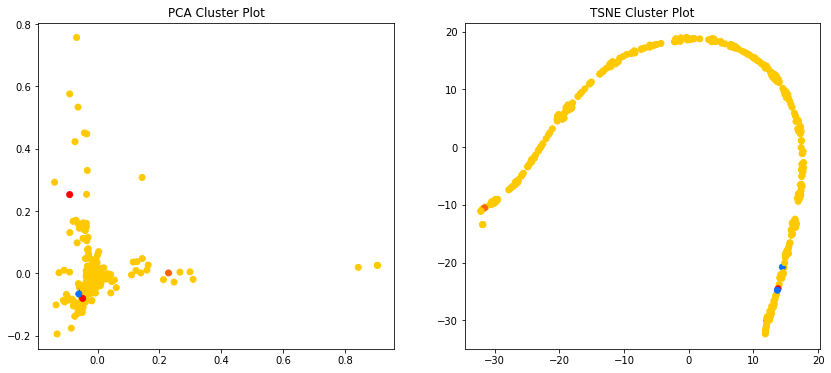

In [21]:
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA

def plot_tsne_pca(dataset, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(dataset.shape[0]), size=500, replace=False)
    
    pca = PCA(n_components=2).fit_transform(dataset[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=1).fit_transform(dataset[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text1, clusters)

In [22]:
def get_top_keywords(dataset, clusters, labels, n_terms):
    df3 = pd.DataFrame(dataset.todense()).groupby(clusters).mean()
    
    for i,r in df3.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text1, clusters, tfidf.get_feature_names(), 10)


Cluster 0
later,phone,time,prob,ur,plan,todays,whats,oh,ok

Cluster 1
movie,shower,did,lol,msg,house,yeah,ok,ll,leave

Cluster 2
good,like,come,know,lt,gt,ok,ur,ll,just

Cluster 3
ûò,don,hope,say,little,pain,hours,took,die,meds

Cluster 4
glad,gone,just,stuff,worry,xx,darlin,mate,film,ok

Cluster 5
gn,gm,gonna,ûò,just,like,sent,food,stuff,type

Cluster 6
god,gn,gonna,yes,thats,days,room,office,didnt,think

Cluster 7
goes,god,gn,gm,gonna,ûò,need,hey,visit,talk

Cluster 8
god,gn,gm,ûò,ok,lol,didn,remember,til,nite

Cluster 9
birthday,morning,ok,did,day,returns,happy,use,aathi,dear

Cluster 10
goin,ûò,going,car,ok,ur,come,home,half,hour

Cluster 11
goes,god,gn,day,things,enjoy,beautiful,smiling,moment,wishing

Cluster 12
dad,able,available,abiola,rest,short,hoping,feb,mid,good

Cluster 13
going,goin,goes,god,goodnight,ìï,yun,oredi,comin,fetch

Cluster 14
gn,gm,gotta,great,time,happy,try,thought,personal,everybody

Cluster 15
god,gn,ûò,ok,ll,sorry,ìï,took,come,forever


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Vectorization 

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dataset['target'])

dataset['target_encoded'] = le.transform(dataset['target'])
dataset.head()

,target,message,message_len,message_clean,tokenized,stopwords_removed,stemming_removed,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy.., availab...","[go, , jurong, point, ,, crazy.., available, ,...","[go, , jurong, point, ,, crazy.., available, ,...",0
1,ham,Ok lar... Joking wif u oni...,6,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, , , wkly, comp, , win, fa, cup, ...","[free, entry, , , wkly, comp, , win, fa, cup, ...",1
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, , early, hor, ..., u, c, already...","[u, dun, say, , early, hor, ..., u, c, already...",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, , , n't, think, , goes, , usf, ,, , live...","[nah, , , n't, think, , goes, , usf, ,, , live...",0


In [24]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = dataset['message_clean']
y = dataset['target_encoded']

print(len(x), len(y))

5572 5572


In [25]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [27]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

Word Embeding : GlOVE

In [28]:
texts = dataset['message_clean']
target = dataset['target_encoded']

In [29]:
# Calculate the length of our vocabulary
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

7736

In [30]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-05-22 06:35:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-22 06:35:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-22 06:35:33--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [31]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/content/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [32]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.046539  ,  0.61966002,  0.56647003, ..., -0.37616   ,
        -0.032502  ,  0.80620003],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [-0.12201   ,  0.20465   ,  0.53192002, ..., -0.164     ,
        -0.41637   ,  0.66426003],
       [-0.41600999,  0.16974001,  0.43457001, ..., -0.083432  ,
         0.49520999,  0.77258003],
       [ 0.46118999,  0.3567    ,  0.026078  , ..., -0.0056525 ,
         0.55176002,  0.77563   ]])

TF-IDF 

In [33]:
def calc_TF(message_clean):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in message_clean:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(target)
    return TF_dict

dataset["embeddings_dictionary"] = dataset['message_clean'].apply(calc_TF)

dataset["embeddings_dictionary"].head()

0    {'g': 0.0008973438621679827, 'o': 0.0012562814...
1    {'o': 0.0005384063173007897, 'k': 0.0003589375...
2    {'f': 0.0007178750897343862, 'r': 0.0008973438...
3    {'u': 0.0005384063173007897, ' ': 0.0017946877...
4    {'n': 0.0007178750897343862, 'a': 0.0003589375...
Name: embeddings_dictionary, dtype: object

In [34]:
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in dataset["embeddings_dictionary"][index]:
    print('%20s' % key, "\t", dataset["embeddings_dictionary"][index][key])

                term 	 TF

                   y 	 0.0003589375448671931
                   e 	 0.0005384063173007897
                   a 	 0.0005384063173007897
                   h 	 0.0007178750897343862
                     	 0.001615218951902369
                   d 	 0.0005384063173007897
                   o 	 0.001256281407035176
                   ! 	 0.0003589375448671931
                   n 	 0.0005384063173007897
                    	 0.0003589375448671931
                   û 	 0.0003589375448671931
                   ÷ 	 0.0003589375448671931
                   t 	 0.0010768126346015793
                   s 	 0.0005384063173007897
                   c 	 0.0005384063173007897
                   l 	 0.0005384063173007897
                   - 	 0.00017946877243359656
                   u 	 0.00017946877243359656
                   m 	 0.00017946877243359656
                   i 	 0.00017946877243359656
                   g 	 0.00017946877243359656


In [35]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(dataset["embeddings_dictionary"])
DF

{'\r': 2,
 ' ': 5532,
 '!': 924,
 '"': 113,
 '#': 220,
 '$': 18,
 '%': 9,
 '&': 475,
 "'": 1333,
 '(': 115,
 ')': 398,
 '*': 144,
 '+': 109,
 ',': 1280,
 '-': 392,
 '.': 3615,
 '/': 235,
 ':': 550,
 ';': 343,
 '=': 25,
 '>': 13,
 '?': 1216,
 '@': 33,
 '\\': 149,
 '^': 1,
 '_': 121,
 'a': 5205,
 'b': 2833,
 'c': 3707,
 'd': 4119,
 'e': 5325,
 'f': 2978,
 'g': 3785,
 'h': 4738,
 'i': 5134,
 'j': 808,
 'k': 2805,
 'l': 4478,
 'm': 4157,
 'n': 5102,
 'o': 5322,
 'p': 3101,
 'q': 193,
 'r': 4797,
 's': 4785,
 't': 5198,
 'u': 4501,
 'v': 2234,
 'w': 3880,
 'x': 893,
 'y': 4298,
 'z': 378,
 '|': 11,
 '~': 3,
 '\x89': 51,
 '\x8b': 1,
 '\x8e': 1,
 '£': 257,
 '©': 1,
 'ª': 2,
 '¬': 2,
 '´': 1,
 'á': 1,
 'â': 1,
 'ä': 1,
 'å': 290,
 'ì': 139,
 'ï': 52,
 'ð': 3,
 'ò': 8,
 'ó': 4,
 'ô': 2,
 'õ': 27,
 'ö': 1,
 '÷': 29,
 'û': 51}

In [36]:
import numpy as np
n_document = len(dataset)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [37]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
dataset["TF-IDF_dict"] = dataset["embeddings_dictionary"].apply(calc_TF_IDF)

In [38]:
# Check TF-IDF result
index = 1

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in dataset["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", dataset["embeddings_dictionary"][index][key] ,"\t" , dataset["TF-IDF_dict"][index][key])
    
TF_IDF = pd.DataFrame(dataset, columns=['term', 'rank'])

                term 	         TF 	              TF-IDF

                   o 	 0.0005384063173007897 	 2.4614322537835055e-05
                   k 	 0.0003589375448671931 	 0.00024622902880017594
                     	 0.0008973438621679827 	 6.302846376154511e-06
                   l 	 0.00017946877243359656 	 3.9187768968484614e-05
                   a 	 0.00017946877243359656 	 1.2193512086357784e-05
                   r 	 0.00017946877243359656 	 2.6840432788954858e-05
                   . 	 0.0010768126346015793 	 0.0004655982915157529
                   j 	 0.00017946877243359656 	 0.0003463227598422837
                   i 	 0.0005384063173007897 	 4.3973911990508476e-05
                   n 	 0.0003589375448671931 	 3.1559746531128806e-05
                   g 	 0.00017946877243359656 	 6.935463085614289e-05
                   w 	 0.00017946877243359656 	 6.4906892234528e-05
                   f 	 0.00017946877243359656 	 0.00011237731195018199
                   u 	 0.00017946

In [39]:
#calc TF-IDF-Group
def calc_TF_IDF_Group(TF_IDF):
    TF_IDF_Dict_Group = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF_IDF:
        TF_IDF_Dict_Group [key] = TF_IDF[key]  *clusters
    return TF_IDF_Dict_Group 

#Stores the TF-IDF Series
dataset["TF_IDF_Dict_Group"] = dataset["embeddings_dictionary"].apply(calc_TF_IDF_Group)

In [40]:
# Check TF-IDF-Group result
index = 1

print('%20s' % "term", "\t", '%10s' % "TF-IDF", "\t", '%20s' % "TF-IDF-Group\n")
for key in dataset["TF_IDF_Dict_Group"][index]:
    print('%20s' % key, "\t", dataset["embeddings_dictionary"][index][key] ,"\t" , dataset["TF_IDF_Dict_Group"][index][key])
    
TF_IDF = pd.DataFrame(dataset, columns=['term', 'rank'])

                term 	     TF-IDF 	        TF-IDF-Group

                   o 	 0.0005384063173007897 	 [0.00107681 0.00107681 0.00107681 ... 0.00107681 0.00107681 0.00107681]
                   k 	 0.0003589375448671931 	 [0.00071788 0.00071788 0.00071788 ... 0.00071788 0.00071788 0.00071788]
                     	 0.0008973438621679827 	 [0.00179469 0.00179469 0.00179469 ... 0.00179469 0.00179469 0.00179469]
                   l 	 0.00017946877243359656 	 [0.00035894 0.00035894 0.00035894 ... 0.00035894 0.00035894 0.00035894]
                   a 	 0.00017946877243359656 	 [0.00035894 0.00035894 0.00035894 ... 0.00035894 0.00035894 0.00035894]
                   r 	 0.00017946877243359656 	 [0.00035894 0.00035894 0.00035894 ... 0.00035894 0.00035894 0.00035894]
                   . 	 0.0010768126346015793 	 [0.00215363 0.00215363 0.00215363 ... 0.00215363 0.00215363 0.00215363]
                   j 	 0.00017946877243359656 	 [0.00035894 0.00035894 0.00035894 ... 0.00035894 0.00035894

In [41]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

dataset["TF_IDF_Vec"] = dataset["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(dataset["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(dataset["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[2.3950816229387145e-05, 6.482924411459978e-05, 5.7433419254948464e-05, 9.754809669086228e-05, 8.704492024620659e-05, 8.794782398101695e-05, 0.00011045911285895082, 0.00016104259673372913, 2.7289853989838063e-05, 2.9061003756659746e-05, 0.00015307416613999912, 0.00023512661381090767, 9.30982119179522e-05, 5.253407510440381e-05, 5.418178258365475e-05, 0.000129813784469056, 0.00034677315428071443, 0.0001461814099834711, 0.0006207977220210039, 0.00010511611470983706, 0.00022475462390036399, 0.0003639976209524788, 0.0, 0.00016394702581694673, 0.0, 0.00026383938137167304, 0.0, 0.0, 0.0, 0.0003463227598422837, 0.0, 0.0, 0.0, 0.0, 0.00048240723794279797, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [42]:
# Convert Series to List
TF_IDF_Vec_List = np.array(dataset["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
18,.,0.837767
19,p,0.656976
20,f,0.637966
17,c,0.631284
21,b,0.617097
11,l,0.608978
14,d,0.600822
23,v,0.567749
16,g,0.564339
22,k,0.545644


BERT

In [43]:
# install transformers
!pip install transformers

     |████████████████████████████████| 4.2 MB 34.6 MB/s 
     |████████████████████████████████| 6.6 MB 76.0 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 596 kB 68.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm.notebook import tqdm


In [45]:
pip install transformers

In [46]:
pip install tokenizers

In [47]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
except:
    strategy = tf.distribute.get_strategy()
    
print('Number of replicas in sync: ', strategy.num_replicas_in_sync)

Number of replicas in sync:  1


In [48]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,

            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

In [49]:
import numpy as np
texts = dataset['message_clean']
target = dataset['target_encoded']
train_input_ids, train_attention_masks = bert_encode(texts,60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [50]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(bert_model):
    
    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [51]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [52]:
model = create_model(bert_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [53]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split=0.2, 
    epochs=1,
    batch_size=8
)

558/558 [==============================] - 2983s 5s/step - loss: 0.1036 - accuracy: 0.9684 - val_loss: 0.0443 - val_accuracy: 0.9883


Cosine Similarity

In [54]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#define arrays
texts = np.random.randint(10, size=100)
target = np.random.randint(10, size=100)

#calculate Cosine Similarity
cos_sim = dot(texts, target)/(norm(texts)*norm(target))

cos_sim

0.6882424272431866

Example

In [55]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#define arrays
dataset.message_clean[1] = np.random.randint(10, size=100)
dataset.message_clean[2] = np.random.randint(10, size=100)

#calculate Cosine Similarity
cos_sim = dot(dataset.message_clean[1], dataset.message_clean[2])/(norm(dataset.message_clean[1])*norm(dataset.message_clean[2]))

cos_sim


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.7149349528184451